In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df = pd.read_csv('/content/diabetes.csv')
display(df)
pregnencies = df['Pregnancies']
glucose = df['Glucose']
blood_pressure = df['BloodPressure']
skin_thickness = df['SkinThickness']
insulin = df['Insulin']
bmi = df['BMI']
diabetes_pedigree_function = df['DiabetesPedigreeFunction']
age = df['Age']
outcome = df['Outcome']

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [19]:


#Data Manipulation: Getting the shape of array
df.shape

#Reshaping the array
reshaped_glucose=np.array(glucose).reshape(1,-1)
print(f"Reshaped Glucose: \n{reshaped_glucose}")

#Transpose of Data
df.describe().T


Reshaped Glucose: 
[[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
  103 115 126  99 196 119 143 125 147  97 145 117 109 158  88  92 122 103
  138 102  90 111 180 133 106 171 159 180 146  71 103 105 103 101  88 176
  150  73 187 100 146 105  84 133  44 141 114  99 109 109  95 146 100 139
  126 129  79   0  62  95 131 112 113  74  83 101 137 110 106 100 136 107
   80 123  81 134 142 144  92  71  93 122 163 151 125  81  85 126  96 144
   83  95 171 155  89  76 160 146 124  78  97  99 162 111 107 132 113  88
  120 118 117 105 173 122 170  84  96 125 100  93 129 105 128 106 108 108
  154 102  57 106 147  90 136 114 156 153 188 152  99 109  88 163 151 102
  114 100 131 104 148 120 110 111 102 134  87  79  75 179  85 129 143 130
   87 119   0  73 141 194 181 128 109 139 111 123 159 135  85 158 105 107
  109 148 113 138 108  99 103 111 196 162  96 184  81 147 179 140 112 151
  109 125  85 112 177 158 119 142 100  87 101 162 197 117 142 134  79 122
   74 171 181 179 1

In [22]:
# Data Cleaning

# Identify missing values in the 'Insulin' column
print(df['Insulin'].isnull().sum())

# Replace missing values in 'Insulin' with the median value
median_insulin = df['Insulin'].median()
df['Insulin'].fillna(median_insulin, inplace=True)

# Check if missing values have been replaced
print(df['Insulin'].isnull().sum())


0
0


In [24]:
# Filtering operations using numpy on BloodPressure

# Filter patients with blood pressure above a certain threshold (e.g., 80)
high_blood_pressure_patients = blood_pressure[blood_pressure > 80]
print(f"Patients with Blood Pressure above 80: \n{high_blood_pressure_patients}")


# Filter patients with blood pressure within a specific range (e.g., 70-85)
patients_within_range = blood_pressure[(blood_pressure >= 70) & (blood_pressure <= 85)]
print(f"\nPatients with Blood Pressure between 70 and 85: \n{patients_within_range}")


# You can also combine filtering with other operations like calculating the mean blood pressure
# of patients with diabetes.
blood_pressure_with_diabetes = blood_pressure[outcome == 1]
mean_blood_pressure_diabetes = np.mean(blood_pressure_with_diabetes)
print(f"\nMean Blood Pressure for Patients with Diabetes: {mean_blood_pressure_diabetes}")

Patients with Blood Pressure above 80: 
9      96
10     92
16     84
20     88
21     84
       ..
746    94
753    88
755    88
756    90
759    92
Name: BloodPressure, Length: 165, dtype: int64

Patients with Blood Pressure between 70 and 85: 
0      72
5      74
8      70
11     74
12     80
       ..
761    74
763    76
764    70
765    72
767    70
Name: BloodPressure, Length: 344, dtype: int64

Mean Blood Pressure for Patients with Diabetes: 70.82462686567165


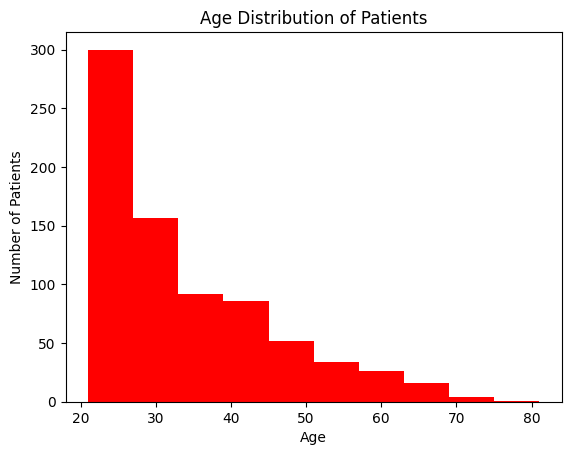

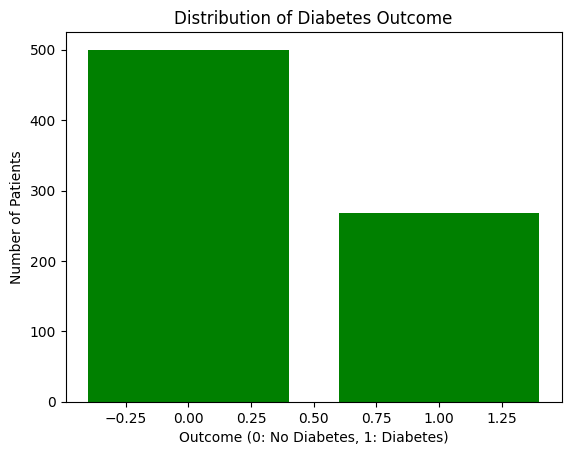

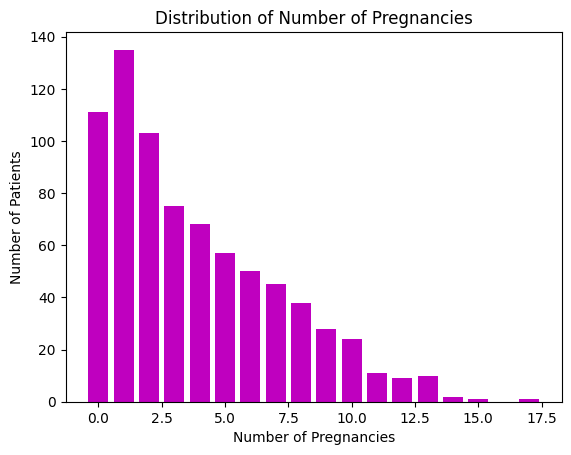

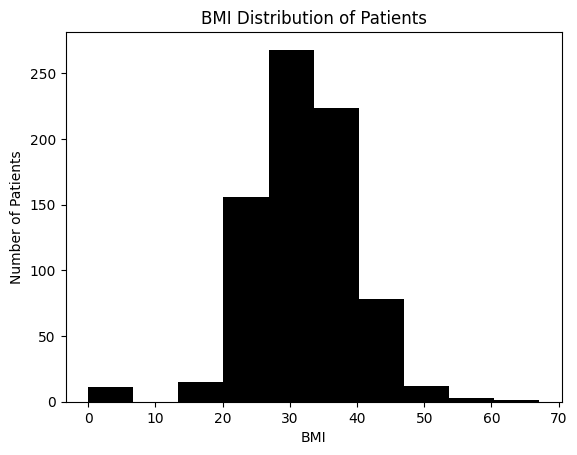

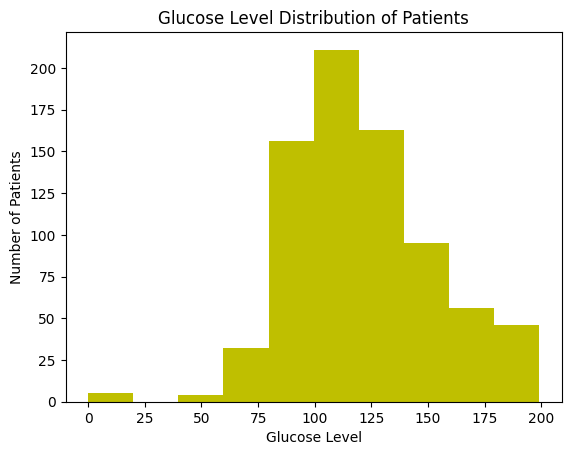

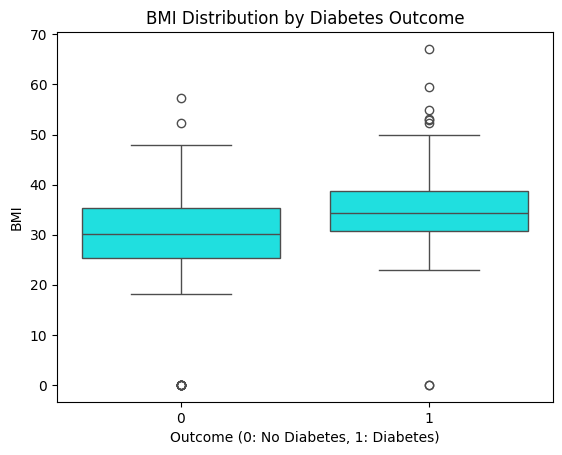

In [29]:
#Visualize patients demographics using histogram and bar plots on various data available

#Histogram of Age
plt.hist(age, bins=10, color="red")
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Age Distribution of Patients')
plt.show()

#Bar plot of Outcome (Diabetes)
outcome_counts = df['Outcome'].value_counts()
plt.bar(outcome_counts.index, outcome_counts.values,color="green")
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Number of Patients')
plt.title('Distribution of Diabetes Outcome')
plt.show()

#Bar plot of Pregnancies
pregnancy_counts = df['Pregnancies'].value_counts()
plt.bar(pregnancy_counts.index, pregnancy_counts.values,color="m")
plt.xlabel('Number of Pregnancies')
plt.ylabel('Number of Patients')
plt.title('Distribution of Number of Pregnancies')
plt.show()

#Histogram of BMI
plt.hist(bmi, bins=10,color="k")
plt.xlabel('BMI')
plt.ylabel('Number of Patients')
plt.title('BMI Distribution of Patients')
plt.show()

#Histogram of Glucose:
plt.hist(glucose, bins=10,color="y")
plt.xlabel('Glucose Level')
plt.ylabel('Number of Patients')
plt.title('Glucose Level Distribution of Patients')
plt.show()

#Boxplot of BMI by Outcome:
sns.boxplot(x='Outcome', y='BMI', data=df,color="cyan")
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('BMI')
plt.title('BMI Distribution by Diabetes Outcome')
plt.show()

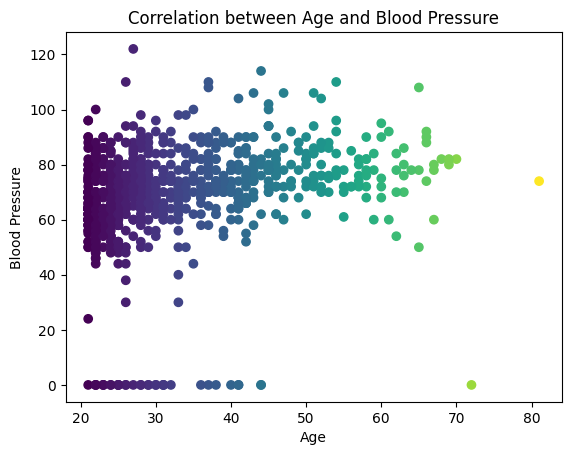

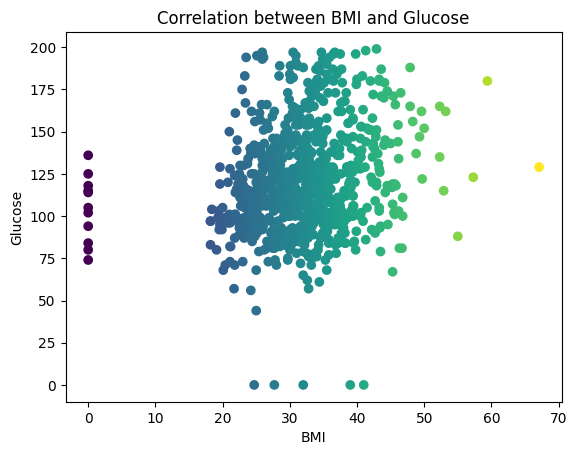

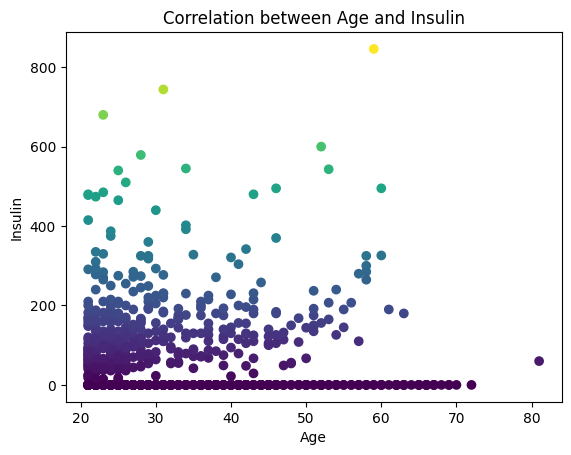

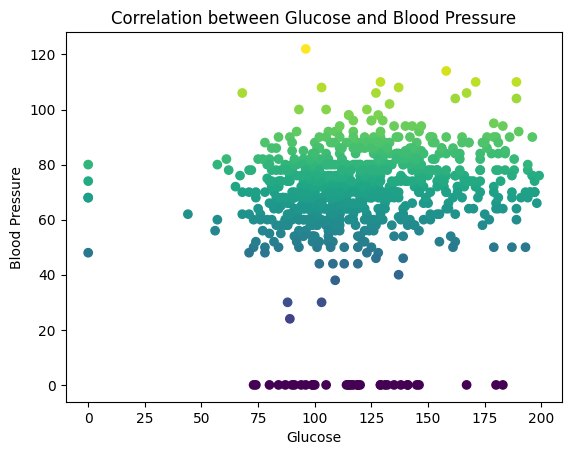

In [34]:
#Scatter plots to analyze correlations between different variables available

# Scatter plot: Age vs. Blood Pressure
# colors=['r','y']
plt.scatter(age, blood_pressure, c=age, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.title('Correlation between Age and Blood Pressure')
plt.show()

# Scatter plot: BMI vs. Glucose
plt.scatter(bmi, glucose, c=bmi, cmap='viridis')
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.title('Correlation between BMI and Glucose')
plt.show()

# Scatter plot: Age vs. Insulin
plt.scatter(age, insulin, c=insulin, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Insulin')
plt.title('Correlation between Age and Insulin')
plt.show()

# Scatter plot: Glucose vs. Blood Pressure
plt.scatter(glucose, blood_pressure, c=blood_pressure, cmap='viridis')
plt.xlabel('Glucose')
plt.ylabel('Blood Pressure')
plt.title('Correlation between Glucose and Blood Pressure')
plt.show()
